In [32]:
from astropy.io import ascii
from MyToolkit import *
from Clustering_module import *
from astropy import units as u
from astropy.io import fits

DP2_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/"

In [37]:
def make_shen_random_catalog(ra_col, dec_col, init_level, resol_upgrd):
    map_now = healpix_sky_map_ps1_cover_area(ra_col, dec_col, init_level)
    map_now = map_now[1]

    map_then = hp.pixelfunc.ud_grade(map_now, 2 ** resol_upgrd)

    map_random = np.zeros_like(map_then)
    val_pos = np.where(map_then != 0)
    num_pix = len(val_pos[0])
    rand = np.random.randint(0, num_pix, 6056)
    rand_pos = val_pos[0][rand]
    map_random[rand_pos] = 1

    rand_ang = hp.pixelfunc.pix2ang(2**resol_upgrd, rand_pos, lonlat=True)

    rand_ra_col = rand_ang[0]
    rand_dec_col = rand_ang[1]
    rand_red_col = np.random.uniform(2.9, 5.4, len(rand_ra_col))

    return rand_ra_col, rand_dec_col, rand_red_col

In [2]:
schneider_file_name = DP2_DIRECTORY + "Data/SDSS_DR5_datafile2.txt"
schneider_data = ascii.read(schneider_file_name)
ra_col_schneider = schneider_data.columns[1].value
dec_col_schneider = schneider_data.columns[2].value
red_col_schneider = schneider_data.columns[3].value

There are 77429 quasars in the catalog


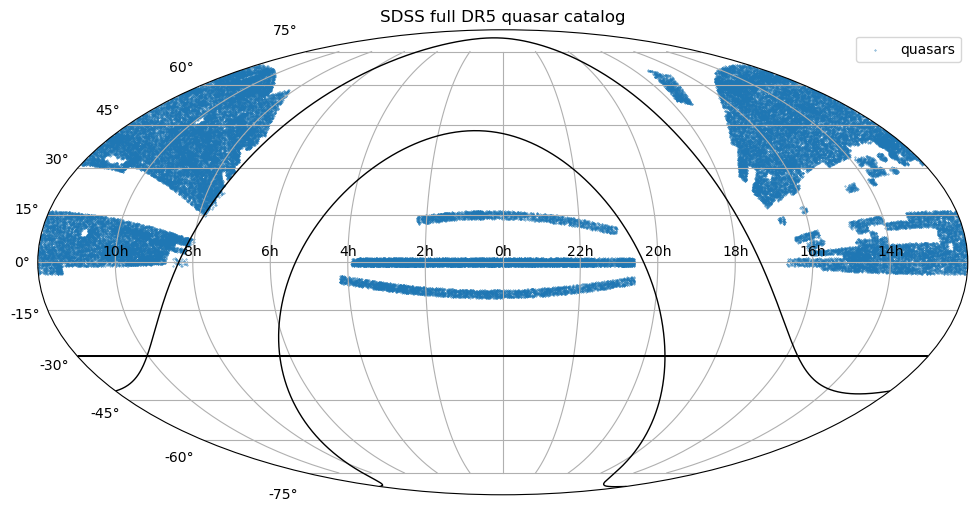

In [4]:
print("There are {} quasars in the catalog".format(len(ra_col_schneider)))
ax = plot_sky_map_ps1(ra_col_schneider, dec_col_schneider, labels=['quasars'], title="SDSS full DR5 quasar catalog", mark_size=0.1)

There are 6056 quasars in the catalog


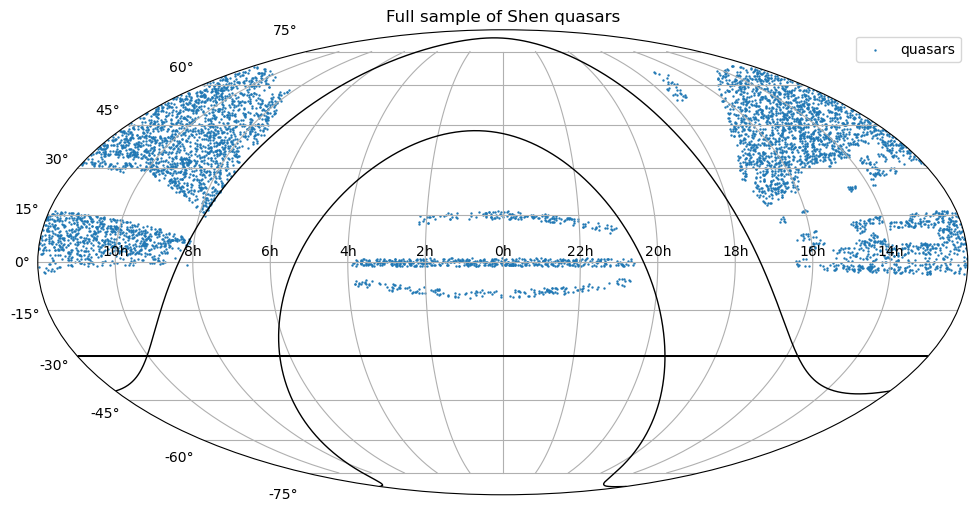

In [5]:
pos_shen = np.where((red_col_schneider >= 2.9) & (red_col_schneider <= 5.4))
print("There are {} quasars in the catalog".format(len(pos_shen[0])))
ra_col_shen = ra_col_schneider[pos_shen]
dec_col_shen = dec_col_schneider[pos_shen]
red_col_shen = red_col_schneider[pos_shen]
ax = plot_sky_map_ps1(ra_col_shen, dec_col_shen, labels=['quasars'], title="Full sample of Shen quasars", mark_size=0.5)

Level    coverage area
    5      7224.63970
    6      6389.54252
    7      5394.55990
    8      2812.99756
    9      917.63646
   10      247.54245


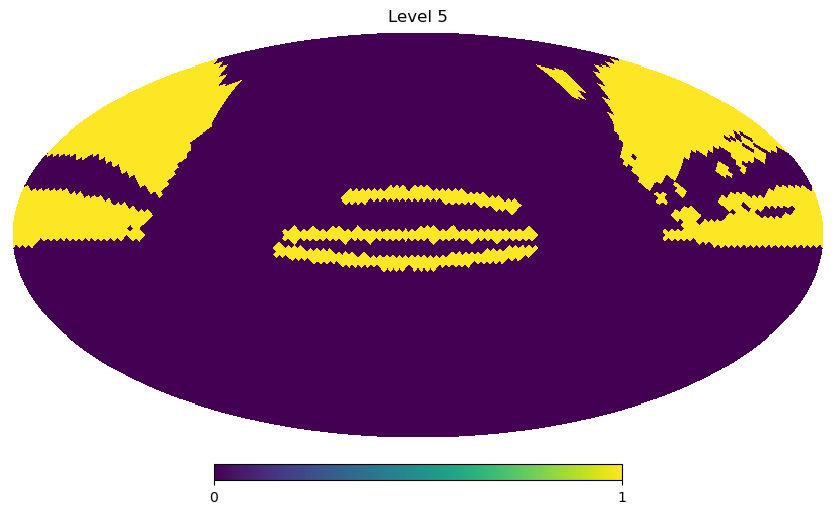

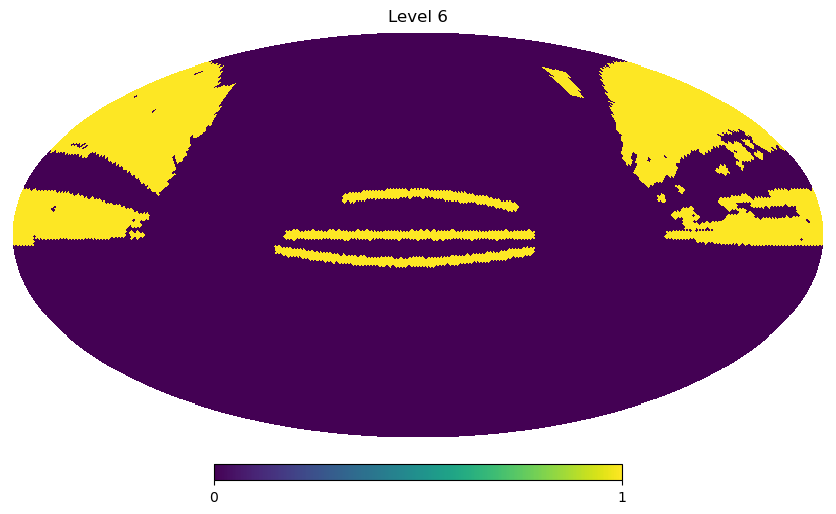

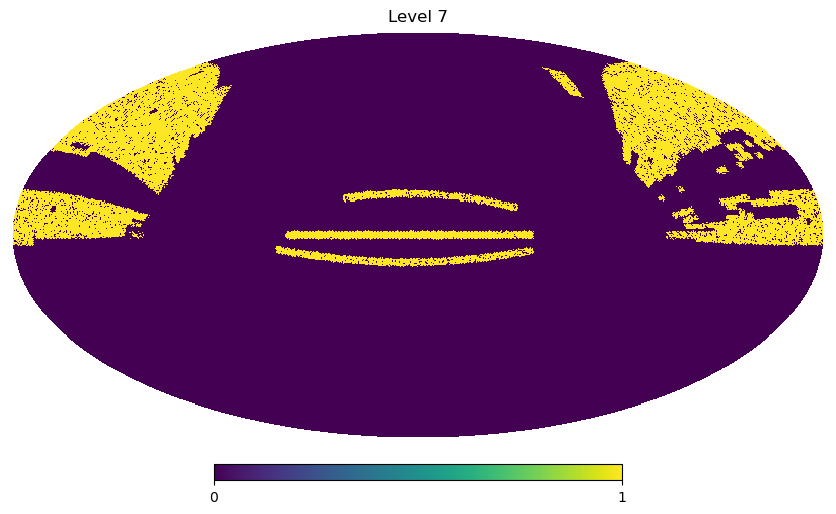

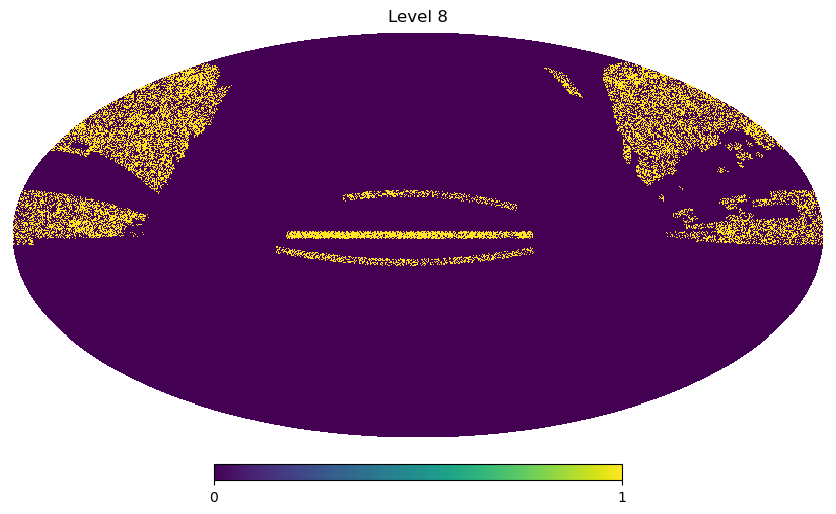

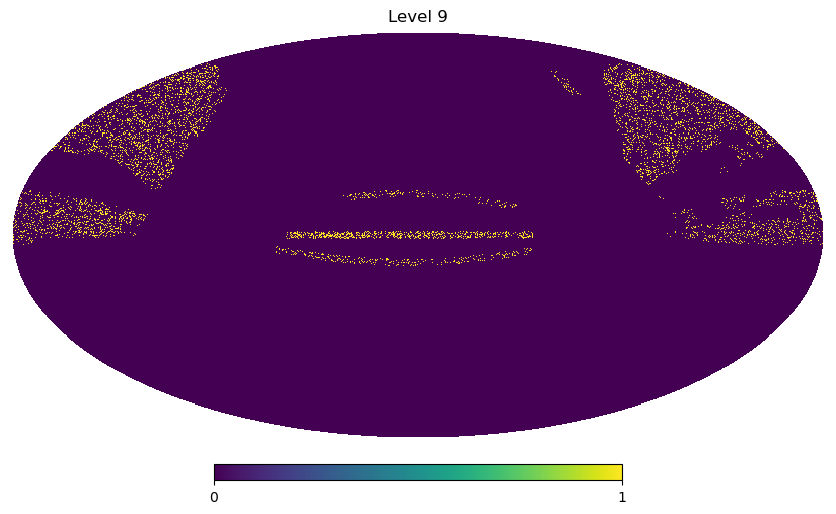

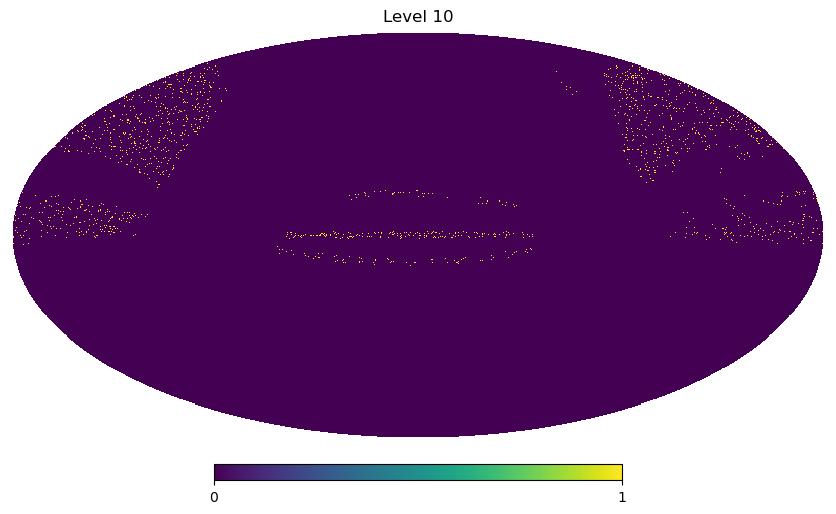

In [12]:
level = []
cov_area = []
print("Level    coverage area")
for i in [5,6,7,8,9,10]:
    map_i, wat = healpix_sky_map_ps1_cover_area(ra_col_schneider, dec_col_schneider, i, title="Level " + str(i))
    level.append(i)
    cov_area.append(map_i)
    print(f'{i:5d}      {map_i:8.5f}')

[7224.639697977724, 6389.5425209926125, 5394.559904594775, 2812.997563630877, 917.6364614063466, 247.5424479752701]


Text(0, 0.5, 'Effective coverage area')

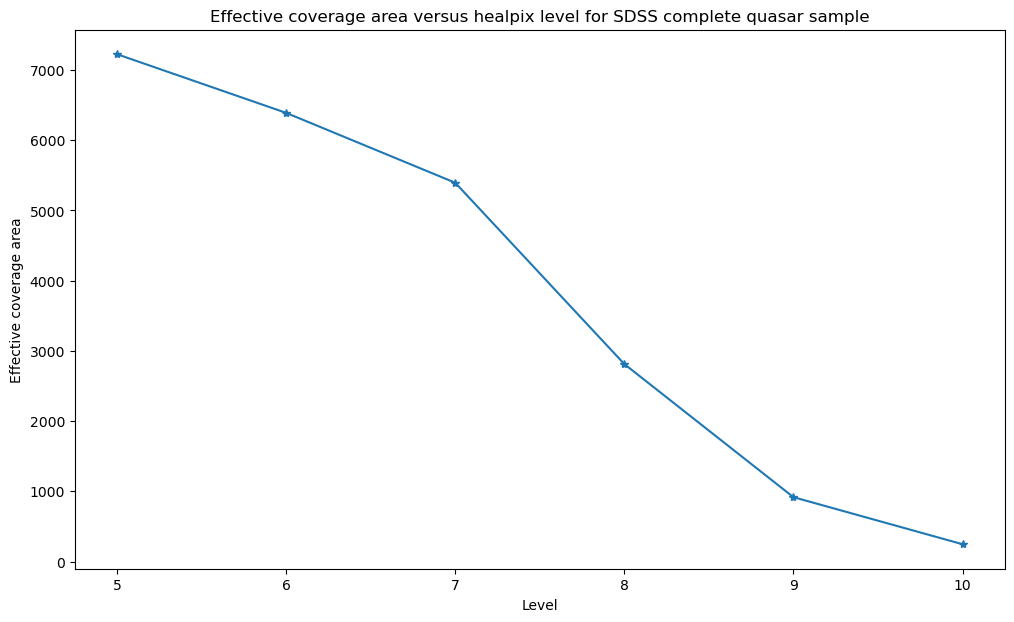

In [7]:
print(cov_area)
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(level, cov_area, '*-')
ax.set_title("Effective coverage area versus healpix level for SDSS complete quasar sample")
ax.set_xlabel("Level")
ax.set_ylabel("Effective coverage area")

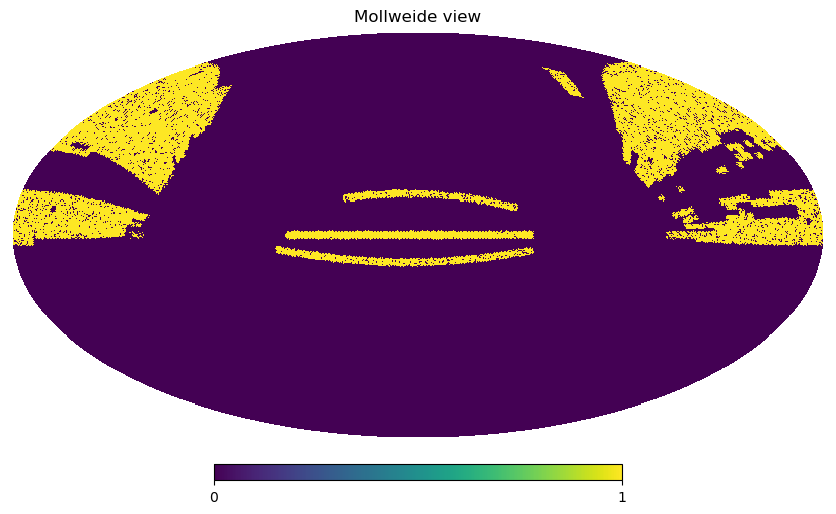

In [8]:
map_now = healpix_sky_map_ps1_cover_area(ra_col_schneider, dec_col_schneider, 7)
map_now = map_now[1]

25710 411360


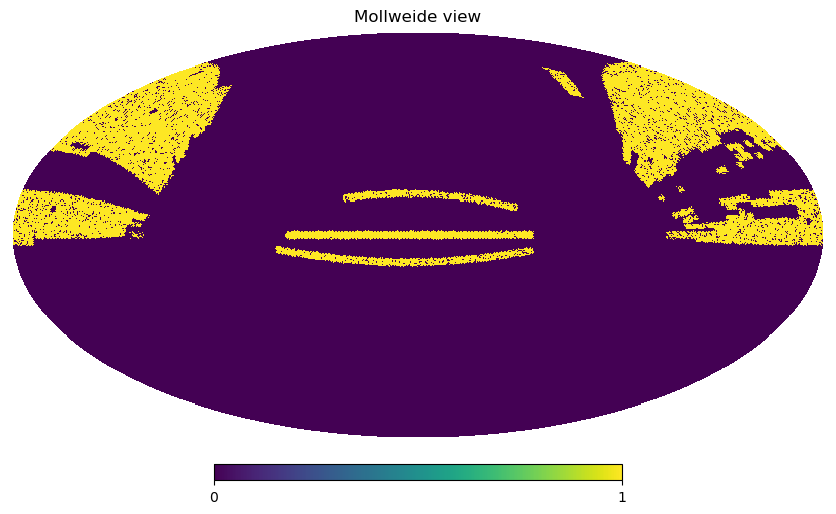

In [9]:
map_then = hp.pixelfunc.ud_grade(map_now, 2 ** 9)
hp.mollview(map_then)
print(len(np.where(map_now != 0)[0]), len(np.where(map_then != 0)[0]))

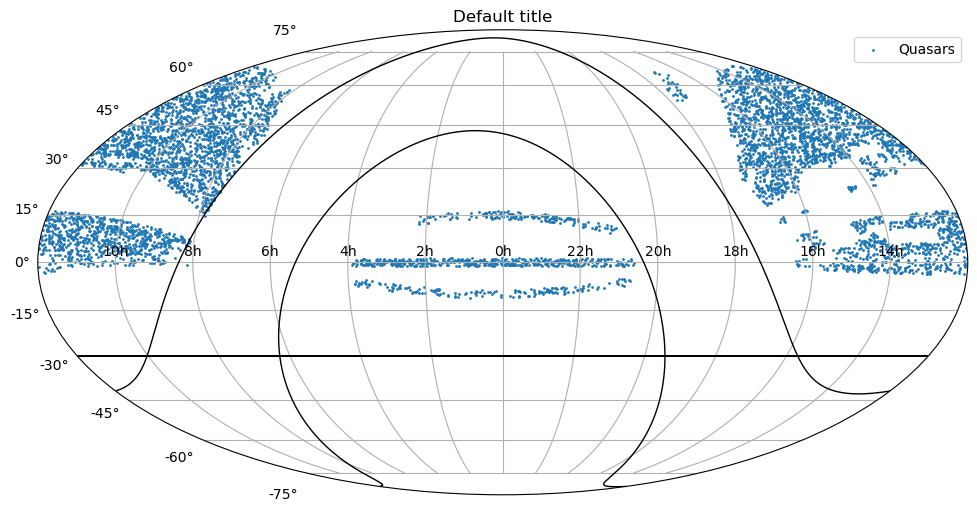

<MollweideAxes: title={'center': 'Default title'}>

In [10]:
plot_sky_map_ps1(ra_col_shen, dec_col_shen, ['Quasars'], mark_size=1)

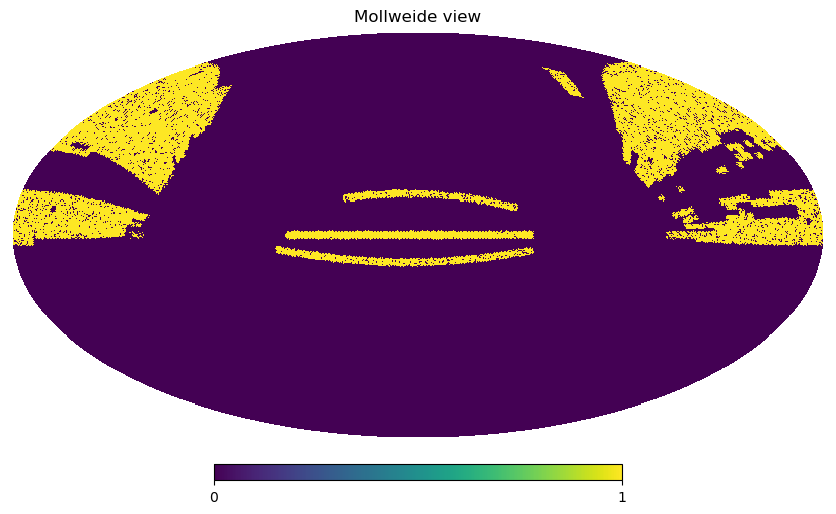

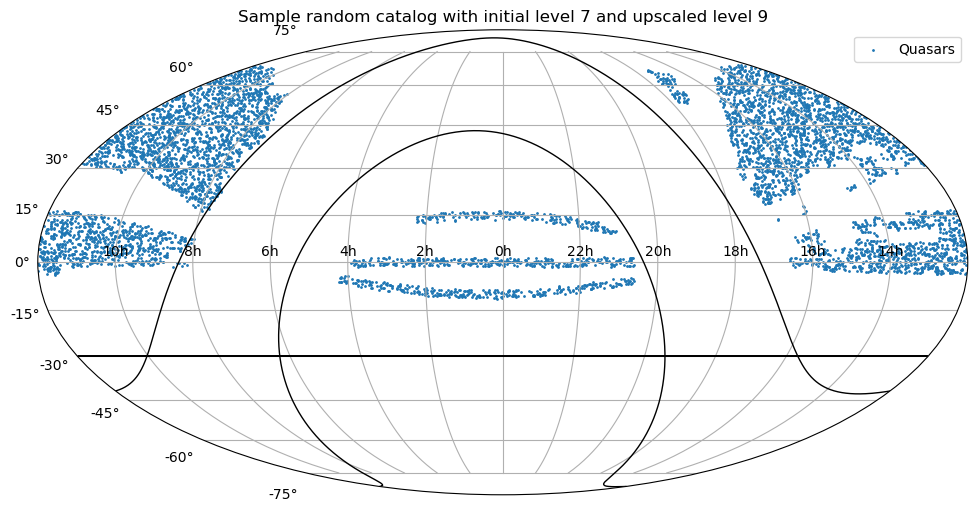

<MollweideAxes: title={'center': 'Sample random catalog with initial level 7 and upscaled level 9'}>

In [25]:
rand_ra_col, rand_dec_col, rand_red_col = make_shen_random_catalog(7, 9)
plot_sky_map_ps1(rand_ra_col, rand_dec_col, ["Quasars"], title="Sample random catalog with initial level 7 and upscaled level 9", mark_size=1)

Text(0.5, 1.0, 'Redshift space clustering of Shen quasars')

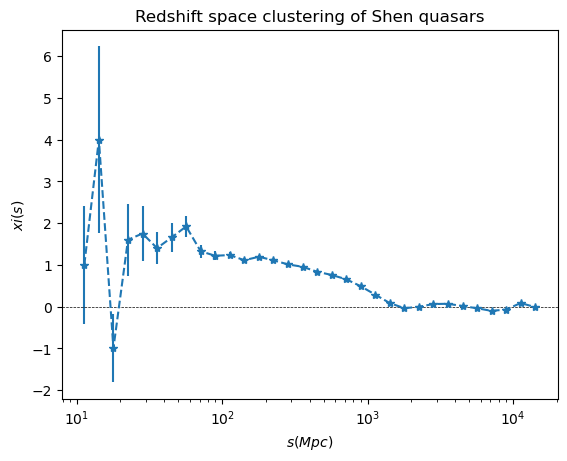

In [20]:
rand_ra_col, rand_dec_col, rand_red_col = make_shen_random_catalog(ra_col_schneider, dec_col_schneider, 7, 9)

ax = find_xi_s(ra_col_shen, dec_col_shen, red_col_shen, "Shen_redshift_space_corr_table_real_signal", \
          rand_ra = rand_ra_col, rand_dec = rand_dec_col, rand_red=rand_red_col)
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim((0,100))
ax.set_title('Redshift space clustering of Shen quasars')

Text(0.5, 1.0, 'Redshift space clustering of Shen quasars')

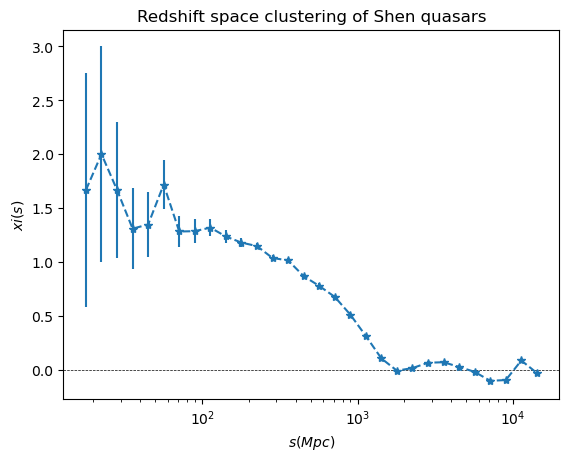

In [30]:
rand_ra_col, rand_dec_col, rand_red_col = make_shen_random_catalog(ra_col_schneider, dec_col_schneider, 7, 11)

ax = find_xi_s(ra_col_shen, dec_col_shen, red_col_shen, "Shen_redshift_space_corr_table_real_signal", \
          rand_ra = rand_ra_col, rand_dec = rand_dec_col, rand_red=rand_red_col)
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim((0,100))
ax.set_title('Redshift space clustering of Shen quasars')

In [35]:
fits_file_name = DP2_DIRECTORY + "Data/eBOSS_QSO_clustering_random-NGC-vDR16.fits"
fits_file = fits.open(fits_file_name)
image_data = fits.getdata(fits_file, ext=0)

TypeError: stat: path should be string, bytes, os.PathLike or integer, not method